- googleアカウントを作る

- googleドライブを/content/driveにマウントする

参照　https://qiita.com/asakuraTsukazaki/items/e7eb1f0c43be1e0231c6

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- ディレクトリ移動（実際には、cd /content/drive/My\Drive)

In [3]:
cd /content/drive/My\ Drive/研究

/content/drive/My Drive/研究


- 実際にはやらなくて良い

In [ ]:
%mkdir yolov5

/content/drive/My Drive/研究/yolov5


- yolov5をダウンロード（最初の1回だけ）

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 8700, done.
remote: Counting objects: 100% (414/414), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 8700 (delta 264), reused 262 (delta 145), pack-reused 8286
Receiving objects: 100% (8700/8700), 9.60 MiB | 9.28 MiB/s, done.
Resolving deltas: 100% (6006/6006), done.


In [6]:
cd yolov5

/content/drive/My Drive/研究/yolov5/yolov5


- yolov5に必要なモジュールをgoogle colabにインストール

CPUとなっていないことを確認

In [7]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


- yolov5が動くかテストする（やらなくてもよい）

動けば次のように表示される。

image 2/2 /content/drive/My Drive/研究/yolov5/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.012s)

In [10]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /content/drive/My Drive/研究/yolov5/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2021-8-3 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/2 /content/drive/My Drive/研究/yolov5/yolov5/

- yolov5の認識結果を見る（やらなくてもよい）

exp4の部分は一番大きば番号に変えること

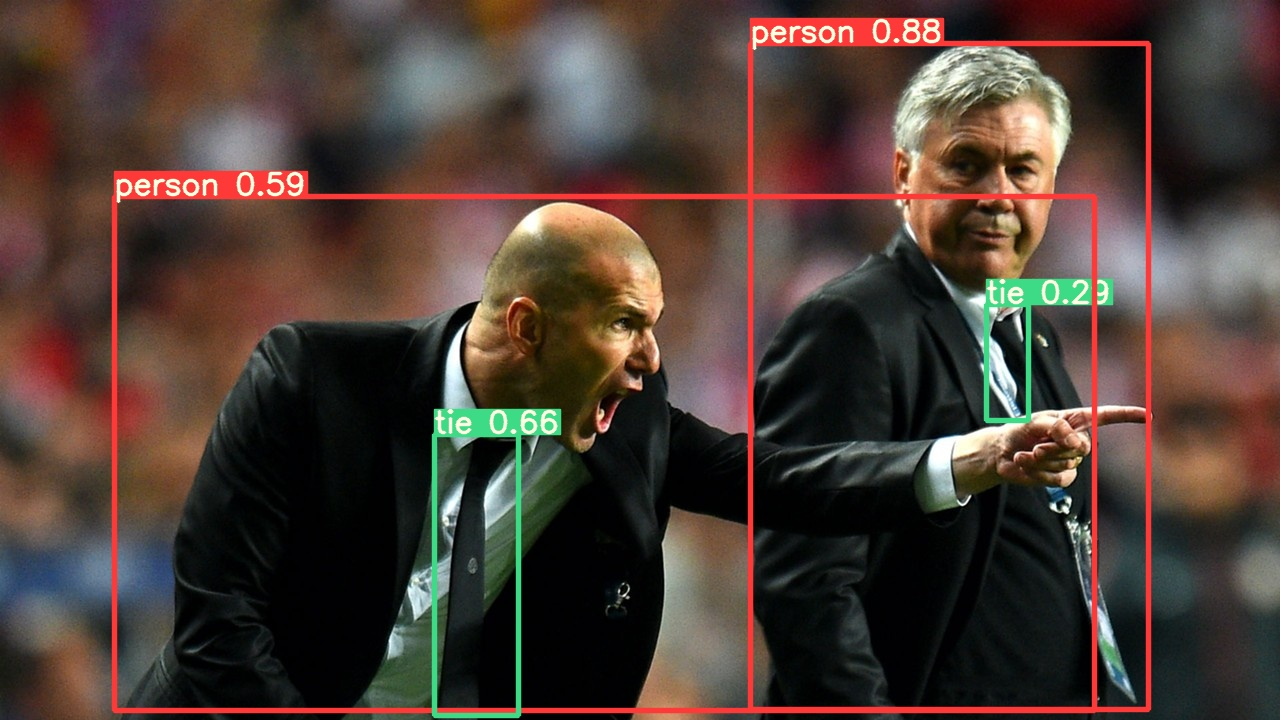

In [12]:
Image(filename='runs/detect/exp4/zidane.jpg', width=600)

- アノテーションデータをgoogleドライブにコピーする（下の例では./data/aquaの配下）、詳細は別途まとめる
- dataset.yamlを作成する（下の例では./logs/001/dataset.yaml)

train: ./data/aqua/train/images

val: ./data/aqua/valid/images

nc: 7

names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish','stingray']

- 機械学習をさせる

0から学習させるときの例

!python train.py --img 416 --batch 8 --epochs 1 --data ./logs/001/dataset.yaml --cfg ./models/yolov5s.yaml --weights ''

転移学習させるときの例

!python train.py --img 416 --batch 8 --epochs 20 --data ./logs/001/dataset.yaml  --weights yolov5s.pt

In [20]:
!python train.py --img 416 --batch 8 --epochs 20　--data ./logs/001/dataset.yaml  --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=./logs/001/dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=20, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: ⚠️ WARNING: code is out of date by 1 commit. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-8-3 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

- 機械学習の結果を確認（やらなくてよい）

この部分に結果を確認したい画像を置く

--source data/test/

そうするとこのフォルダあたりに結果が出力される

Results saved to runs/detect/exp6

In [21]:
#静止画
!python detect.py --weights runs/train/exp6/weights/best.pt --source data/test/

#動画
#!python detect.py --weights runs/train/exp6/weights/best.pt --source data/movies/

detect: weights=['runs/train/exp6/weights/best.pt'], source=data/test/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-8-3 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7070092 parameters, 0 gradients
image 1/7 /content/drive/My Drive/研究/yolov5/yolov5/data/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 penguin, 1 shark, Done. (0.013s)
image 2/7 /content/drive/My Drive/研究/yolov5/yolov5/data/test/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 1 fish, 1 jellyfish, 21 penguins, 1 puffin, Done. (0.012s)
image 3/7 /content/drive/My Drive/研究/yolov5/yolov5/data/test/IMG_2319_jpeg_jpg.rf.6e20bf97d17b7

In [8]:
!python detect.py --weights runs/train/exp6/weights/best.pt --source data/movies/

ストリーミング出力は最後の 5000 行に切り捨てられました。
video 1/1 (562/5559) /content/drive/My Drive/研究/yolov5/yolov5/data/movies/fish.mp4: 384x640 41 fishs, 14 jellyfishs, Done. (0.011s)
video 1/1 (563/5559) /content/drive/My Drive/研究/yolov5/yolov5/data/movies/fish.mp4: 384x640 44 fishs, 15 jellyfishs, Done. (0.011s)
video 1/1 (564/5559) /content/drive/My Drive/研究/yolov5/yolov5/data/movies/fish.mp4: 384x640 47 fishs, 13 jellyfishs, Done. (0.011s)
video 1/1 (565/5559) /content/drive/My Drive/研究/yolov5/yolov5/data/movies/fish.mp4: 384x640 51 fishs, 10 jellyfishs, Done. (0.011s)
video 1/1 (566/5559) /content/drive/My Drive/研究/yolov5/yolov5/data/movies/fish.mp4: 384x640 52 fishs, 10 jellyfishs, Done. (0.011s)
video 1/1 (567/5559) /content/drive/My Drive/研究/yolov5/yolov5/data/movies/fish.mp4: 384x640 52 fishs, 10 jellyfishs, Done. (0.011s)
video 1/1 (568/5559) /content/drive/My Drive/研究/yolov5/yolov5/data/movies/fish.mp4: 384x640 52 fishs, 10 jellyfishs, Done. (0.011s)
video 1/1 (569/5559) /content/drive/My Drive

In [13]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from IPython.display import IFrame
from IPython.display import display
!pip install youtube_dl
import youtube_dl

def makeAnimation(frames):
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=1000/30.0)
    display(HTML(anim.to_jshtml()))

In [ ]:
movie = "runs/detect/exp7/fish.mp4" 
cap = cv2.VideoCapture(movie)

# 最初の30フレームを取り出す
ret, frame = cap.read()
imgs = [frame] # 最初のフレーム
for i in range(1000):      
    ret, frame = cap.read()
    imgs.append(frame)

makeAnimation(frames=imgs)

In [20]:
cap

<VideoCapture 0x7fb0024ebf30>

In [21]:
cap.read()

(False, None)